# Auto-encoders and Generative models in `keras`

In this session, you will experiment with auto-encoders and then a family of generative models called 
Generative Adversarial Models (GANs).

## Auto-encoders

**Question 1.** Implement a shallow auto-encoder (with a single layer from the input to the hidden 
representation in dimension 16, and a single layer from this hidden representation to the output) and 
fit it to MNIST training set.



In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.models import Sequential


(X_train, _), (X_test, _) = mnist.load_data()
# Represent images as long vectors of pixels in [0, 1]
X_train = X_train.reshape((X_train.shape[0], -1)) / 255.
X_train = X_train[::2]  # Keep half of the dataset
X_test = X_test.reshape((X_test.shape[0], -1)) / 255.
X_test = X_test[::2]  # Keep half of the dataset

model_ae = Sequential([
    InputLayer(input_shape=X_train.shape[1:]),
    Dense(units=16, activation="relu"),
    Dense(units=X_train.shape[1], activation="relu")
])
model_ae.compile(optimizer="adam", loss="mse")
model_ae.fit(X_train, X_train, epochs=10)


2022-12-13 08:33:02.562330: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-13 08:33:10.654819: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0368
Epoch 2/10
938/938 [==============================] - 1s 2ms/step - loss: 0.0283
Epoch 3/10
938/938 [==============================] - 1s 2ms/step - loss: 0.0275
Epoch 4/10
938/938 [==============================] - 1s 2ms/step - loss: 0.0273
Epoch 5/10
938/938 [==============================] - 1s 2ms/step - loss: 0.0272
Epoch 6/10
938/938 [==============================] - 1s 2ms/step - loss: 0.0272
Epoch 7/10
938/938 [==============================] - 1s 2ms/step - loss: 0.0271
Epoch 8/10
938/938 [==============================] - 1s 2ms/step - loss: 0.0271
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0271
Epoch 10/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0271


**Question 2.** Use the code below to visualize the quality of reconstruction on some test samples.

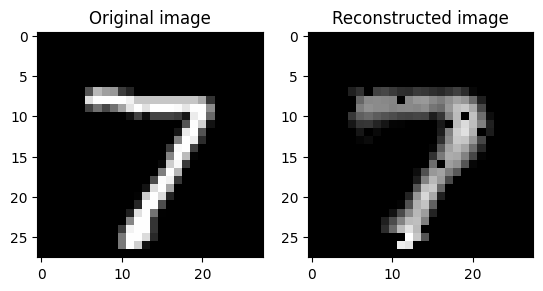

In [2]:
import matplotlib.pyplot as plt

def plot_reconstruction(img, reconstruction):
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(img.reshape((28, 28)), cmap="gray")
    plt.title("Original image")
    plt.subplot(1, 2, 2)
    plt.imshow(reconstruction.reshape((28, 28)), cmap="gray")
    plt.title("Reconstructed image")

preds = model_ae(X_test).numpy()
plot_reconstruction(X_test[0], preds[0])


**Question 3.** Check if adding more layers (in both the encoder and decoder, trying to keep a mirror 
structure) helps better reconstructing the images.

In [3]:
model_ae = Sequential([
    InputLayer(input_shape=X_train.shape[1:]),
    Dense(units=300, activation="relu"),
    Dense(units=16, activation="relu"),
    Dense(units=300, activation="relu"),
    Dense(units=X_train.shape[1], activation="relu")
])
model_ae.compile(optimizer="adam", loss="mse")
model_ae.fit(X_train, X_train, epochs=10)

Epoch 1/10
938/938 [==============================] - 8s 7ms/step - loss: 0.0311
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0231
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0213
Epoch 4/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0203
Epoch 5/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0195
Epoch 6/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0186
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0181
Epoch 8/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0177
Epoch 9/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0174
Epoch 10/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0172


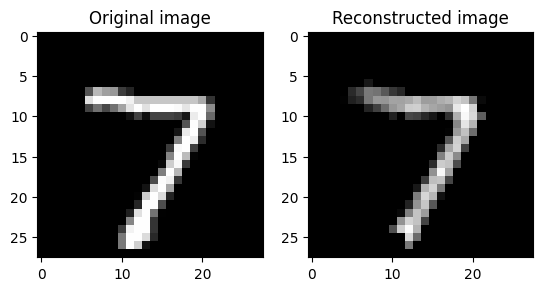

In [4]:
preds = model_ae(X_test).numpy()
plot_reconstruction(X_test[0], preds[0])

Auto-encoders are known to be good image denoisers, if trained using noisy images as inputs and clean ones as outputs.

**Question 4.** Using the below-defined noisy copies of `X_train` and `X_test`, check the denoising 
capabilities of a network with the same structure as in the previous question.

In [10]:
import numpy as np

X_train_noisy = X_train + .5 * np.random.randn(*X_train.shape)
X_test_noisy = X_test + .5 * np.random.randn(*X_test.shape)

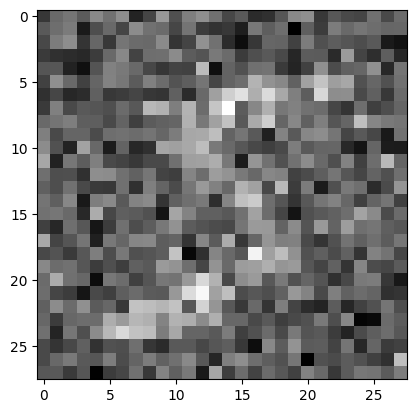

In [11]:
plt.imshow(X_train_noisy[0].reshape((28, 28)), cmap="gray")

In [12]:


model_ae = Sequential([
    InputLayer(input_shape=X_train.shape[1:]),
    Dense(units=300, activation="relu"),
    Dense(units=16, activation="relu"),
    Dense(units=300, activation="relu"),
    Dense(units=X_train.shape[1], activation="relu")
])
model_ae.compile(optimizer="adam", loss="mse")
model_ae.fit(X_train_noisy, X_train, epochs=10)

Epoch 1/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0364
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0285
Epoch 3/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0263
Epoch 4/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0247
Epoch 5/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0234
Epoch 6/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0225
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0216
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0207
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0202
Epoch 10/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0198


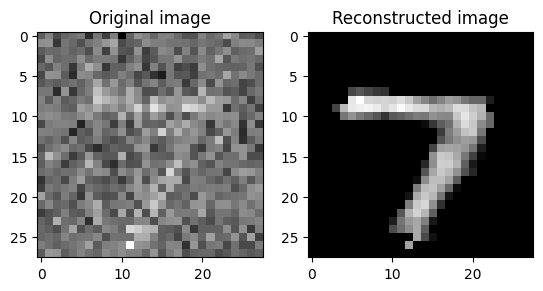

In [13]:
preds = model_ae(X_test_noisy).numpy()
plot_reconstruction(X_test_noisy[0], preds[0])

## Generative Adversarial Networks (GAN)

In this section, you will be invited to play with two types of GAN models to generate MNIST-like data.

First, you will find below an almost complete implementation of the original GAN model (widely inspired from <https://github.com/eriklindernoren/Keras-GAN>).

**Question 5.** Fill in the blanks (TODO marks in the `train` method) to complete the code and train a model on MNIST for 1000 epochs.

In [16]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, ZeroPadding2D, LeakyReLU
from tensorflow.keras.layers import UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

import numpy as np

class GAN():
    def __init__(self):
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 100

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        validity = self.discriminator(img)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, validity)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)


    def build_generator(self):

        model = Sequential()

        model.add(Dense(256, input_dim=self.latent_dim))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(np.prod(self.img_shape), activation='tanh'))
        model.add(Reshape(self.img_shape))

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)

    def build_discriminator(self):

        model = Sequential()

        model.add(Flatten(input_shape=self.img_shape))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1, activation='sigmoid'))

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

    def train(self, epochs, batch_size=128):

        # Load the dataset
        (X_train, _), (_, _) = mnist.load_data()

        # Rescale -1 to 1
        X_train = X_train / 127.5 - 1.
        X_train = np.expand_dims(X_train, axis=3)

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random batch of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]

            noise = np.random.randn(batch_size, self.latent_dim)
            
            # Generate a batch of new images
            gen_imgs = self.generator.predict(noise)

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            noise = np.random.randn(batch_size, self.latent_dim)

            # Train the generator (to have the discriminator label samples as valid)
            g_loss = self.combined.train_on_batch(noise, valid)

            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

gan = GAN()
gan.train(epochs=4 * 1000)


4/4 [==============================] - 0s 3ms/step
0 [D loss: 1.065229, acc.: 17.97%] [G loss: 0.721127]
4/4 [==============================] - 0s 4ms/step
1 [D loss: 0.428850, acc.: 80.08%] [G loss: 0.706895]
4/4 [==============================] - 0s 3ms/step
2 [D loss: 0.366502, acc.: 75.39%] [G loss: 0.704082]
4/4 [==============================] - 0s 4ms/step
3 [D loss: 0.366403, acc.: 71.88%] [G loss: 0.758519]
4/4 [==============================] - 0s 3ms/step
4 [D loss: 0.349250, acc.: 78.12%] [G loss: 0.769665]
4/4 [==============================] - 0s 7ms/step
5 [D loss: 0.344519, acc.: 78.91%] [G loss: 0.868483]
4/4 [==============================] - 0s 4ms/step
6 [D loss: 0.317019, acc.: 88.67%] [G loss: 0.958516]
4/4 [==============================] - 0s 7ms/step
7 [D loss: 0.284505, acc.: 93.36%] [G loss: 1.077246]
4/4 [==============================] - 0s 9ms/step
8 [D loss: 0.249253, acc.: 96.88%] [G loss: 1.247290]
4/4 [==============================] - 0s 5ms/step
9 [D

Now that your model is trained, generate a few images and visualize them with the code below:

1/1 [==============================] - 0s 147ms/step


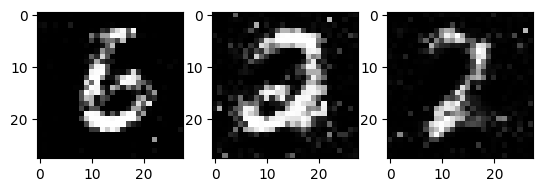

In [17]:
import matplotlib.pyplot as plt

n_images = 3
z = np.random.randn(n_images, gan.latent_dim)
gen_imgs = gan.generator.predict(z)

# Rescale images 0 - 1
gen_imgs = 0.5 * gen_imgs + 0.5
for i in range(n_images):
  plt.subplot(1, 3, i + 1)
  plt.imshow(gen_imgs[i, :, :, 0], cmap='gray')

Code for a Conditional GAN is quite similar (_cf._ below, once again widely inspired from the same GitHub repository).

**Question 6.** What is the input fed to the generator to generate a fake sample?

In [18]:
from tensorflow.keras.layers import Multiply, Embedding


class CGAN():
    def __init__(self):
        # Input shape
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.num_classes = 10
        self.latent_dim = 100

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss=['binary_crossentropy'],
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise and the target label as input
        # and generates the corresponding digit of that label
        noise = Input(shape=(self.latent_dim,))
        label = Input(shape=(1,))
        img = self.generator([noise, label])

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated image as input and determines validity
        # and the label of that image
        valid = self.discriminator([img, label])

        # The combined model  (stacked generator and discriminator)
        # Trains generator to fool discriminator
        self.combined = Model([noise, label], valid)
        self.combined.compile(loss=['binary_crossentropy'],
            optimizer=optimizer)

    def build_generator(self):

        model = Sequential()

        model.add(Dense(256, input_dim=self.latent_dim))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(np.prod(self.img_shape), activation='tanh'))
        model.add(Reshape(self.img_shape))

        noise = Input(shape=(self.latent_dim,))
        label = Input(shape=(1,), dtype='int32')
        label_embedding = Flatten()(Embedding(self.num_classes, self.latent_dim)(label))

        model_input = Multiply()([noise, label_embedding])
        img = model(model_input)

        return Model([noise, label], img)

    def build_discriminator(self):

        model = Sequential()

        model.add(Dense(512, input_dim=np.prod(self.img_shape)))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(Dense(1, activation='sigmoid'))

        img = Input(shape=self.img_shape)
        label = Input(shape=(1,), dtype='int32')

        label_embedding = Flatten()(Embedding(self.num_classes, np.prod(self.img_shape))(label))
        flat_img = Flatten()(img)

        model_input = Multiply()([flat_img, label_embedding])

        validity = model(model_input)

        return Model([img, label], validity)

    def train(self, epochs, batch_size=128, sample_interval=50):

        # Load the dataset
        (X_train, y_train), (_, _) = mnist.load_data()

        # Configure input
        X_train = (X_train.astype(np.float32) - 127.5) / 127.5
        X_train = np.expand_dims(X_train, axis=3)
        y_train = y_train.reshape(-1, 1)

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random half batch of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs, labels = X_train[idx], y_train[idx]

            # Sample noise as generator input
            noise = np.random.normal(0, 1, (batch_size, 100))

            # Generate a half batch of new images
            gen_imgs = self.generator.predict([noise, labels])

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch([imgs, labels], valid)
            d_loss_fake = self.discriminator.train_on_batch([gen_imgs, labels], fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            # Condition on labels
            sampled_labels = np.random.randint(0, 10, batch_size).reshape(-1, 1)

            # Train the generator
            g_loss = self.combined.train_on_batch([noise, sampled_labels], valid)

            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
            
cgan = CGAN()
cgan.train(epochs=1000)

4/4 [==============================] - 0s 4ms/step
0 [D loss: 0.695357, acc.: 23.05%] [G loss: 0.682359]
4/4 [==============================] - 0s 3ms/step
1 [D loss: 0.683980, acc.: 49.61%] [G loss: 0.674025]
4/4 [==============================] - 0s 3ms/step
2 [D loss: 0.676414, acc.: 50.00%] [G loss: 0.666514]
4/4 [==============================] - 0s 4ms/step
3 [D loss: 0.667273, acc.: 50.00%] [G loss: 0.655970]
4/4 [==============================] - 0s 3ms/step
4 [D loss: 0.653281, acc.: 50.00%] [G loss: 0.647510]
4/4 [==============================] - 0s 4ms/step
5 [D loss: 0.640978, acc.: 50.00%] [G loss: 0.634499]
4/4 [==============================] - 0s 3ms/step
6 [D loss: 0.623933, acc.: 50.00%] [G loss: 0.624823]
4/4 [==============================] - 0s 3ms/step
7 [D loss: 0.598103, acc.: 50.00%] [G loss: 0.611814]
4/4 [==============================] - 0s 3ms/step
8 [D loss: 0.566695, acc.: 51.17%] [G loss: 0.599462]
4/4 [==============================] - 0s 4ms/step
9 [D

**Question 7.** Fit the model for 1000 epochs and, once fitted, generate a few fake "8" handwritten digits (take inspiration from the code above to show the generated images).

1/1 [==============================] - 0s 265ms/step


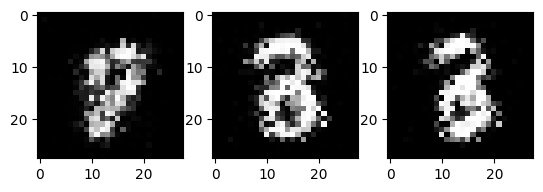

In [22]:
n_images = 3
z = np.random.randn(n_images, gan.latent_dim)
target_labels = np.array([8, 8, 8]).reshape((3, 1))
gen_imgs = cgan.generator.predict([z, target_labels])

# Rescale images 0 - 1
gen_imgs = 0.5 * gen_imgs + 0.5
for i in range(n_images):
  plt.subplot(1, 3, i + 1)
  plt.imshow(gen_imgs[i, :, :, 0], cmap='gray')